In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tseries.offsets import BDay

In [176]:
all_ = pd.read_csv("./dataset/ALL.csv")
all_["date"] = pd.to_datetime(all_["date"])
print(all_.shape)
all_

(37745224, 7)


,date,open,high,low,close,volume,ticker
0,2024-01-02 09:30:00,1592.79,1592.79,1592.79,1592.79,559.0,TPL
1,2024-01-02 10:55:00,1618.76,1618.76,1618.76,1618.76,139.0,TPL
2,2024-01-02 11:05:00,1617.02,1617.02,1617.02,1617.02,753.0,TPL
3,2024-01-02 11:08:00,1619.00,1619.00,1619.00,1619.00,467.0,TPL
4,2024-01-02 11:19:00,1623.97,1623.97,1623.97,1623.97,632.0,TPL
...,...,...,...,...,...,...,...
37745219,2024-11-07 15:55:00,121.09,121.15,121.06,121.11,50127.0,XOM
37745220,2024-11-07 15:56:00,121.11,121.15,121.09,121.15,50994.0,XOM
37745221,2024-11-07 15:57:00,121.15,121.15,121.07,121.09,52459.0,XOM
37745222,2024-11-07 15:58:00,121.10,121.13,121.04,121.05,95864.0,XOM


In [177]:
all_.loc[(all_["date"] > pd.to_datetime("2024-11-01")) & 
         (all_["date"] < pd.to_datetime("2024-11-03"))]


,date,open,high,low,close,volume,ticker
12459,2024-11-01 09:30:00,1163.60,1163.60,1163.60,1163.60,1649.0,TPL
12460,2024-11-01 09:33:00,1174.00,1175.00,1174.00,1175.00,460.0,TPL
12461,2024-11-01 09:36:00,1172.19,1172.19,1172.19,1172.19,126.0,TPL
12462,2024-11-01 09:42:00,1173.00,1173.00,1173.00,1173.00,186.0,TPL
12463,2024-11-01 09:47:00,1173.84,1173.84,1166.66,1166.66,604.0,TPL
...,...,...,...,...,...,...,...
37743659,2024-11-01 15:55:00,115.19,115.31,115.15,115.26,172777.0,XOM
37743660,2024-11-01 15:56:00,115.25,115.27,115.15,115.16,152825.0,XOM
37743661,2024-11-01 15:57:00,115.16,115.18,115.13,115.14,204009.0,XOM
37743662,2024-11-01 15:58:00,115.15,115.15,114.95,114.97,305903.0,XOM


# Normalization

In [178]:
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(1e-6, 1.0))  # Set minimum to 1e-6

In [179]:
# Get numeric columns
numeric_columns = all_.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')


In [180]:
# Initialize an empty DataFrame to store the normalized data
normalized_df = pd.DataFrame()

In [181]:
# Group by 'Company' and apply the scaler to each group
for company, group in all_.groupby('ticker'):
    # Initialize the scaler with minimum 1e-6
    scaler = MinMaxScaler(feature_range=(1e-3, 1.0))
    
    # Fit and transform the numeric columns for each company
    group_scaled = group.copy()
    group_scaled[numeric_columns] = scaler.fit_transform(group[numeric_columns])
    
    # Append the normalized group to the normalized_df
    normalized_df = pd.concat([normalized_df, group_scaled])

# Sort the normalized DataFrame by date to maintain order
normalized_df = normalized_df.sort_index()

In [182]:
print(normalized_df.shape)
normalized_df.date = pd.to_datetime(normalized_df.date)
normalized_df = normalized_df.set_index("date")
normalized_df

(37745224, 7)


,open,high,low,close,volume,ticker
date,,,,,,
2024-01-02 09:30:00,0.970750,0.970750,0.970750,0.970750,0.016565,TPL
2024-01-02 10:55:00,0.993658,0.993658,0.993658,0.993658,0.004870,TPL
2024-01-02 11:05:00,0.992123,0.992123,0.992123,0.992123,0.021966,TPL
2024-01-02 11:08:00,0.993870,0.993870,0.993870,0.993870,0.014003,TPL
2024-01-02 11:19:00,0.998253,0.998253,0.998253,0.998253,0.018597,TPL
...,...,...,...,...,...,...
2024-11-07 15:55:00,0.829971,0.829755,0.830984,0.830355,0.011650,XOM
2024-11-07 15:56:00,0.830628,0.829755,0.831968,0.831668,0.011839,XOM
2024-11-07 15:57:00,0.831941,0.829755,0.831312,0.829699,0.012157,XOM


In [200]:
valid_trading_days = pd.date_range(
    start=normalized_df.index.min().date(),
    end=normalized_df.index.max().date(),
    freq=BDay()  # Business days only
)
valid_trading_days = valid_trading_days.date

In [184]:
normalized_df.shape

(37745224, 6)

In [185]:
# Define stock market opening and closing times
market_open = pd.to_datetime("09:30").time()
market_close = pd.to_datetime("15:59").time()

# Resample data for each ticker to 1-minute intervals and forward-fill missing rows
uniform_data = (
    normalized_df.groupby("ticker")  # Group by ticker
    .apply(lambda group: group.resample("1T").ffill())  # Resample to 1 minute and forward-fill
    .reset_index(level=0, drop=True)  # Remove the grouped ticker level from the index
    .reset_index()  # Reset the index to flatten the dataframe
)

# Filter out rows outside market hours
uniform_data = uniform_data[
    (uniform_data['date'].dt.time >= market_open) &
    (uniform_data['date'].dt.time <= market_close)
]

print(uniform_data.shape)

uniform_data

/tmp/ipykernel_172712/3689335284.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .apply(lambda group: group.resample("1T").ffill())  # Resample to 1 minute and forward-fill
/tmp/ipykernel_172712/3689335284.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.resample("1T").ffill())  # Resample to 1 minute and forward-fill


(60280711, 7)


,date,open,high,low,close,volume,ticker
0,2024-01-02 09:30:00,0.450791,0.447896,0.450573,0.447855,0.018427,A
1,2024-01-02 09:31:00,0.448217,0.445322,0.446930,0.444214,0.002054,A
2,2024-01-02 09:32:00,0.447252,0.444357,0.448861,0.446144,0.001605,A
3,2024-01-02 09:33:00,0.447413,0.473957,0.449022,0.469301,0.006264,A
4,2024-01-02 09:34:00,0.470739,0.482643,0.471704,0.484418,0.003045,A
...,...,...,...,...,...,...,...
222053156,2024-11-07 15:55:00,0.515130,0.515049,0.518042,0.518004,0.046645,ZTS
222053157,2024-11-07 15:56:00,0.515310,0.516845,0.518946,0.520170,0.067035,ZTS
222053158,2024-11-07 15:57:00,0.517464,0.521694,0.522202,0.525583,0.079007,ZTS
222053159,2024-11-07 15:58:00,0.522491,0.525107,0.527265,0.528290,0.108587,ZTS


In [190]:
uniform_data["date_day"] = pd.to_datetime(uniform_data["date"]).dt.date
uniform_data

,date,open,high,low,close,volume,ticker,date_day
0,2024-01-02 09:30:00,0.450791,0.447896,0.450573,0.447855,0.018427,A,2024-01-02
1,2024-01-02 09:31:00,0.448217,0.445322,0.446930,0.444214,0.002054,A,2024-01-02
2,2024-01-02 09:32:00,0.447252,0.444357,0.448861,0.446144,0.001605,A,2024-01-02
3,2024-01-02 09:33:00,0.447413,0.473957,0.449022,0.469301,0.006264,A,2024-01-02
4,2024-01-02 09:34:00,0.470739,0.482643,0.471704,0.484418,0.003045,A,2024-01-02
...,...,...,...,...,...,...,...,...
222053156,2024-11-07 15:55:00,0.515130,0.515049,0.518042,0.518004,0.046645,ZTS,2024-11-07
222053157,2024-11-07 15:56:00,0.515310,0.516845,0.518946,0.520170,0.067035,ZTS,2024-11-07
222053158,2024-11-07 15:57:00,0.517464,0.521694,0.522202,0.525583,0.079007,ZTS,2024-11-07
222053159,2024-11-07 15:58:00,0.522491,0.525107,0.527265,0.528290,0.108587,ZTS,2024-11-07


In [196]:
uniform_data["date_day"] = pd.to_datetime(uniform_data["date_day"])

In [198]:
valid_trading_days

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-15',
               ...
               '2024-10-25', '2024-10-28', '2024-10-29', '2024-10-30',
               '2024-10-31', '2024-11-01', '2024-11-04', '2024-11-05',
               '2024-11-06', '2024-11-07'],
              dtype='datetime64[ns]', length=223, freq='B')

In [291]:
group_sizes = uniform_data.groupby("ticker").size()

if group_sizes.nunique() == 1:
    print("All groups have the same size.")
else:
    print("Groups have different sizes.")
print("Group Sizes:\n", group_sizes)

Groups have different sizes.
Group Sizes:
 ticker
A       121290
AAPL    121290
ABBV    121289
ABNB    121290
ABT     121290
         ...  
XYL     121290
YUM     121290
ZBH     121290
ZBRA    121290
ZTS     121290
Length: 497, dtype: int64


In [202]:
uniform_data_ = uniform_data[uniform_data["date_day"].dt.date.isin(valid_trading_days)]
print(uniform_data_.shape)
uniform_data_

(43223671, 8)


,date,open,high,low,close,volume,ticker,date_day
0,2024-01-02 09:30:00,0.450791,0.447896,0.450573,0.447855,0.018427,A,2024-01-02
1,2024-01-02 09:31:00,0.448217,0.445322,0.446930,0.444214,0.002054,A,2024-01-02
2,2024-01-02 09:32:00,0.447252,0.444357,0.448861,0.446144,0.001605,A,2024-01-02
3,2024-01-02 09:33:00,0.447413,0.473957,0.449022,0.469301,0.006264,A,2024-01-02
4,2024-01-02 09:34:00,0.470739,0.482643,0.471704,0.484418,0.003045,A,2024-01-02
...,...,...,...,...,...,...,...,...
222053156,2024-11-07 15:55:00,0.515130,0.515049,0.518042,0.518004,0.046645,ZTS,2024-11-07
222053157,2024-11-07 15:56:00,0.515310,0.516845,0.518946,0.520170,0.067035,ZTS,2024-11-07
222053158,2024-11-07 15:57:00,0.517464,0.521694,0.522202,0.525583,0.079007,ZTS,2024-11-07
222053159,2024-11-07 15:58:00,0.522491,0.525107,0.527265,0.528290,0.108587,ZTS,2024-11-07


In [203]:
uniform_data_.loc[(uniform_data_["date"] > pd.to_datetime("2024-11-02")) & 
         (uniform_data_["date"] < pd.to_datetime("2024-11-03"))]

,date,open,high,low,close,volume,ticker,date_day


In [290]:
group_sizes = uniform_data_.groupby("ticker").size()

if group_sizes.nunique() == 1:
    print("All groups have the same size.")
else:
    print("Groups have different sizes.")
print("Group Sizes:\n", group_sizes)

All groups have the same size.
Group Sizes:
 ticker
A       86190
AAPL    86190
ABBV    86190
ABNB    86190
ABT     86190
        ...  
XYL     86190
YUM     86190
ZBH     86190
ZBRA    86190
ZTS     86190
Length: 497, dtype: int64


In [204]:
# Define the start and end dates as datetime objects
start_date = pd.to_datetime('2024-01-03 00:00')
end_date = pd.to_datetime('2024-11-07 00:00')

# Filter rows within the date range
uniform_data_ = uniform_data_[
    (uniform_data_['date'] >= start_date) & (uniform_data_['date'] <= end_date)
]
uniform_data_

,date,open,high,low,close,volume,ticker,date_day
1440,2024-01-03 09:30:00,0.444678,0.441783,0.419583,0.417840,0.014947,A,2024-01-03
1441,2024-01-03 09:31:00,0.417330,0.414435,0.406713,0.404009,0.006376,A,2024-01-03
1442,2024-01-03 09:32:00,0.400278,0.397383,0.366174,0.364770,0.019458,A,2024-01-03
1443,2024-01-03 09:33:00,0.365852,0.369391,0.330139,0.328747,0.030145,A,2024-01-03
1444,2024-01-03 09:34:00,0.326278,0.323704,0.310030,0.312015,0.018307,A,2024-01-03
...,...,...,...,...,...,...,...,...
222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06
222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06
222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06
222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06


In [425]:
# Select a ticker (e.g., 'AAPL')
ticker = 'A'

# Get normalized data for the ticker
resampled_data_ticker = uniform_data_.loc[
    uniform_data_['ticker'] == ticker
]
resampled_data_ticker.set_index("date", inplace=True)
resampled_data_ticker.index = pd.to_datetime(
    resampled_data_ticker.index
)

resampled_data_ticker

,open,high,low,close,volume,ticker,date_day
date,,,,,,,
2024-01-03 09:30:00,0.444678,0.441783,0.419583,0.417840,0.014947,A,2024-01-03
2024-01-03 09:31:00,0.417330,0.414435,0.406713,0.404009,0.006376,A,2024-01-03
2024-01-03 09:32:00,0.400278,0.397383,0.366174,0.364770,0.019458,A,2024-01-03
2024-01-03 09:33:00,0.365852,0.369391,0.330139,0.328747,0.030145,A,2024-01-03
2024-01-03 09:34:00,0.326278,0.323704,0.310030,0.312015,0.018307,A,2024-01-03
...,...,...,...,...,...,...,...
2024-11-06 15:55:00,0.429878,0.430522,0.429878,0.431670,0.017676,A,2024-11-06
2024-11-06 15:56:00,0.432130,0.436957,0.433739,0.438103,0.022205,A,2024-11-06
2024-11-06 15:57:00,0.439530,0.439209,0.438887,0.436173,0.035451,A,2024-11-06


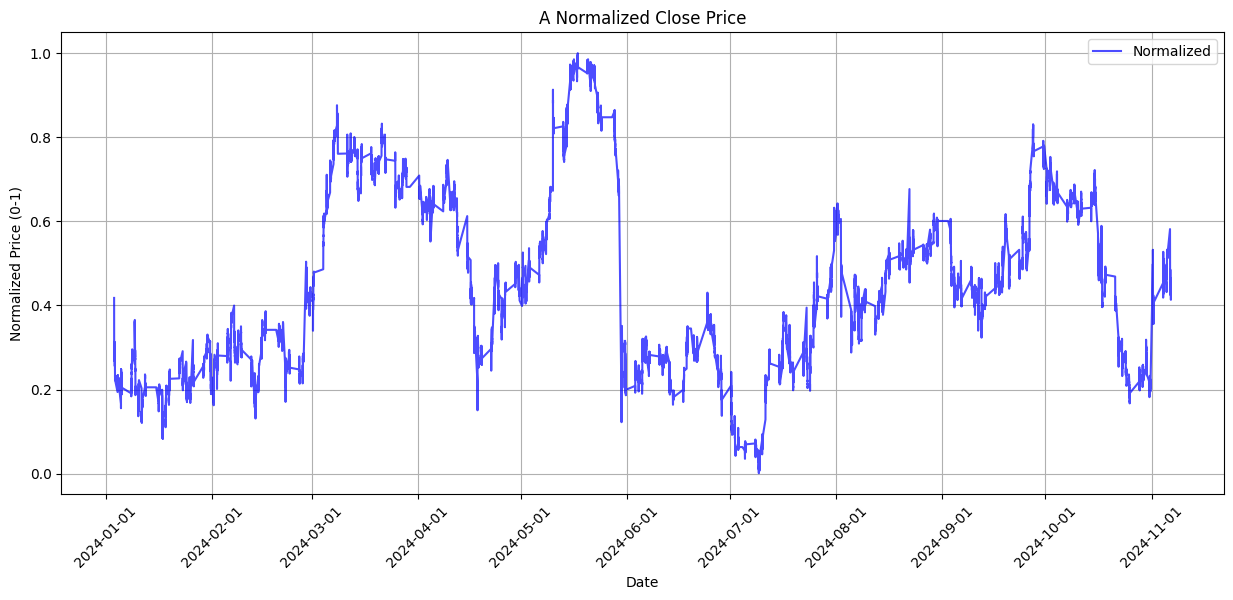

In [426]:
# Create the plot
plt.figure(figsize=(15, 6))

# Plot normalized data
plt.plot(
    resampled_data_ticker.index,
    resampled_data_ticker['close'],
    label='Normalized', color='blue', alpha=0.7
)

# Format the x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title(f'{ticker} Normalized Close Price')
plt.xlabel('Date')
plt.ylabel('Normalized Price (0-1)')
plt.legend()
plt.grid(True)

In [427]:
uniform_data_[uniform_data_.isnull().any(axis=1)]

,date,open,high,low,close,volume,ticker,date_day


In [428]:
# First, identify companies that have any NaN values
companies_with_nans = uniform_data_.groupby("ticker").apply(
    lambda x: x.isna().any().any()
)
clean_companies = companies_with_nans[~companies_with_nans].index

# Filter the dataframe to keep only companies without NaN values
clean_df = uniform_data_[uniform_data_["ticker"].isin(clean_companies)]

# Print some information about the cleaning
print(f"Original number of companies: {uniform_data_['ticker'].nunique()}")

print(f"Number of companies after removing those with NaNs: {clean_df['ticker'].nunique()}")

print(f"Number of companies removed: {uniform_data_['ticker'].nunique() - clean_df['ticker'].nunique()}")

/tmp/ipykernel_172712/2227199614.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  companies_with_nans = uniform_data_.groupby("ticker").apply(


Original number of companies: 497
Number of companies after removing those with NaNs: 497
Number of companies removed: 0


In [429]:
group_sizes = uniform_data_.groupby("ticker").size()

# Find the most common group size
most_common_size = group_sizes.mode().iloc[0]

# Identify groups that don't match the most common size
outliers = group_sizes[group_sizes != most_common_size]

if not outliers.empty:
    print("Tickers with different sizes:")
    print(outliers)
else:
    print("All groups have the most common size:", most_common_size)


All groups have the most common size: 86190


In [294]:
uniform_data_.loc[uniform_data_["ticker"] == "ABBV"]

,date,open,high,low,close,volume,ticker,date_day
895019,2024-01-03 09:30:00,0.131159,0.137193,0.132167,0.136609,0.004266,ABBV,2024-01-03
895020,2024-01-03 09:31:00,0.138607,0.139615,0.130483,0.134094,0.066105,ABBV,2024-01-03
895021,2024-01-03 09:32:00,0.132725,0.137752,0.125898,0.137168,0.013246,ABBV,2024-01-03
895022,2024-01-03 09:33:00,0.138234,0.139988,0.133851,0.134374,0.005819,ABBV,2024-01-03
895023,2024-01-03 09:34:00,0.133672,0.134212,0.123559,0.122638,0.012362,ABBV,2024-01-03
...,...,...,...,...,...,...,...,...
1338924,2024-11-06 15:55:00,0.891255,0.891567,0.892223,0.888048,0.020742,ABBV,2024-11-06
1338925,2024-11-06 15:56:00,0.888276,0.888586,0.885486,0.883391,0.042871,ABBV,2024-11-06
1338926,2024-11-06 15:57:00,0.883807,0.888400,0.887919,0.887862,0.023769,ABBV,2024-11-06
1338927,2024-11-06 15:58:00,0.888090,0.888586,0.891661,0.886744,0.030454,ABBV,2024-11-06


In [295]:
uniform_data_.loc[uniform_data_["ticker"] == "AAPL"]

,date,open,high,low,close,volume,ticker,date_day
448230,2024-01-03 09:30:00,0.275029,0.281172,0.271170,0.281538,0.122360,AAPL,2024-01-03
448231,2024-01-03 09:31:00,0.281304,0.287713,0.279502,0.287131,0.036369,AAPL,2024-01-03
448232,2024-01-03 09:32:00,0.287033,0.289212,0.285785,0.289312,0.026156,AAPL,2024-01-03
448233,2024-01-03 09:33:00,0.289351,0.289894,0.287833,0.290676,0.021914,AAPL,2024-01-03
448234,2024-01-03 09:34:00,0.290647,0.294100,0.290429,0.294493,0.036742,AAPL,2024-01-03
...,...,...,...,...,...,...,...,...
892135,2024-11-06 15:55:00,0.804810,0.805814,0.801812,0.800200,0.026683,AAPL,2024-11-06
892136,2024-11-06 15:56:00,0.800036,0.798728,0.798943,0.799109,0.021773,AAPL,2024-11-06
892137,2024-11-06 15:57:00,0.799082,0.798456,0.799626,0.799791,0.018764,AAPL,2024-11-06
892138,2024-11-06 15:58:00,0.799764,0.799546,0.799626,0.798018,0.031200,AAPL,2024-11-06


In [296]:
grouped = uniform_data_.groupby("ticker")

# List to hold each ticker's data as a 2D array
ticker_arrays = []

# Iterate over each group, sort by time, and collect the values
for name, group in grouped:
    try:
        sorted_group = group.sort_index()  # Ensure sorted by time
        
        # Get the values for the required columns
        group_values = sorted_group[
            ["open", "high", "low", "volume", "close"]
        ].values
        
        # Check for NaN values
        if np.any(np.isnan(group_values)):
            print(f"Warning: NaN values found in ticker {name}")
            print("NaN locations:", np.where(np.isnan(group_values)))
            continue  # Skip this group
            
        ticker_arrays.append(group_values)
    
    except Exception as e:
        # Print error message, ticker, and dataframe
        print(f"Error occurred with ticker {name}: {e}")
        print("Dataframe causing the issue:")
        print(group)
        continue

# Convert the list of 2D arrays into a 3D numpy array
result_array = np.array(ticker_arrays)
print("Shape of the 3D array:", result_array.shape)


Shape of the 3D array: (497, 86190, 5)


In [297]:
date_unique = uniform_data_.date.unique()
ordered_dates = sorted(pd.to_datetime(date_unique))

In [298]:
print(len(ordered_dates))

86190


In [196]:
np.save('./dataset/SP500/sp500_2024.npy', result_array)

In [197]:
price_data = result_array[:, :, -1]
price_data

array([[0.41783967, 0.40400934, 0.3647698 , ..., 0.43617289, 0.43102672,
        0.43552962],
       [0.28153829, 0.28713133, 0.28931208, ..., 0.79979085, 0.79801788,
        0.79992724],
       [0.13660917, 0.13409444, 0.137168  , ..., 0.88786164, 0.88674399,
        0.88674399],
       ...,
       [0.60077023, 0.60077023, 0.59830204, ..., 0.27311797, 0.26910716,
        0.27034126],
       [0.17836854, 0.17629156, 0.16584554, ..., 0.97916905, 0.97642009,
        0.97831382],
       [0.92150199, 0.91554697, 0.91572742, ..., 0.46476987, 0.46368714,
        0.46242395]])

In [256]:
new_result_array = result_array[:, 90000:, :]
new_result_array.shape

(497, 30510, 5)

In [248]:
total_size = result_array.shape[1]
print("Total size: ", total_size)

clip = 94000
print("Clip: ", clip)

Total size:  120510
Clip:  94000


In [249]:
print(
    f"Training: from {ordered_dates[clip]} to {ordered_dates[106079]}\
    \nLength: {len(ordered_dates[clip:106079])}"
)
print(
    f"\nValidation: from {ordered_dates[106080]} to {ordered_dates[120119]}\
    \nLength: {len(ordered_dates[106080:120119])}"
)
print(
    f"\nTesting: from {ordered_dates[120120]} to {ordered_dates[120509]}. \
    \nLength: {len(ordered_dates[120120:120509])}"
)

Training: from 2024-08-31 09:40:00 to 2024-09-30 15:59:00    
Length: 12079

Validation: from 2024-10-01 09:30:00 to 2024-11-05 15:59:00    
Length: 14039

Testing: from 2024-11-06 09:30:00 to 2024-11-06 15:59:00.     
Length: 389


In [250]:
# Remaining data size after clipping
remaining_size = total_size - clip
print("Remaining size: ", remaining_size)

Remaining size:  26510


In [254]:
train_proportion = 106079 / total_size
val_proportion = (120119 - 106080) / total_size 
test_proportion = (120509 - 120120) / total_size

# Recalculate sizes based on proportions
train_size = int(remaining_size * train_proportion)
val_size = int(remaining_size * val_proportion)
test_size = remaining_size - train_size - val_size  # Ensure total matches

# Slicing indices for each dataset
train_start = 0
train_end = train_size
val_start = train_end
val_end = val_start + val_size
test_start = val_end
test_end = remaining_size


In [255]:
print(
    "Shape of the 3D array:", 
    result_array[:, clip:, :].shape
)
print("Train: ", result_array[:, train_start:train_end, :].shape)
print("Validation: ", result_array[:, val_start:val_end, :].shape)
print("Test: ", result_array[:, test_start:test_end, :].shape)
print(
    result_array[:, train_start:train_end, :].shape[1] +\
    result_array[:, val_start:val_end, :].shape[1] +\
    result_array[:, test_start:test_end, :].shape[1]
)

Shape of the 3D array: (497, 26510, 5)
Train:  (497, 23335, 5)
Validation:  (497, 3088, 5)
Test:  (497, 87, 5)
26510


## Reduced Array

In [299]:
# Define the start and end dates as datetime objects
start_date = pd.to_datetime('2024-10-30 00:00')
end_date = pd.to_datetime('2024-11-07 00:00')

print("Before: ", len(uniform_data_.date.unique()))
# Filter rows within the date range
uniform_data_reduced = uniform_data_[
    (uniform_data_['date'] >= start_date) & (uniform_data_['date'] <= end_date)
]
print("After: ", len(uniform_data_reduced.date.unique()))
uniform_data_reduced

Before:  86190
After:  2340


,date,open,high,low,close,volume,ticker,date_day
434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30
434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30
434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30
434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30
434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30
...,...,...,...,...,...,...,...,...
222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06
222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06
222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06
222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06


In [303]:
# EMA (Exponential Moving Average) is a type of moving average that gives more weight to recent price data. 
# For one-minute bars, a common lookback period is 45 minutes, which is equivalent to 9 * 5 minutes.
ema_one_minute_bars = 9 * 5

# SMA (Simple Moving Average) is a type of moving average that gives equal weight to all price data in the lookback period.
# For daily bars, a common lookback period is 50 days.
sma_daily_bars = 50

In [304]:
uniform_data_reduced["EMA"] = uniform_data_reduced.groupby(["ticker", "date"])["close"].transform(
    lambda x: x.ewm(span=ema_one_minute_bars).mean()
)
uniform_data_reduced

/tmp/ipykernel_172712/335466707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_data_reduced["EMA"] = uniform_data_reduced.groupby(["ticker", "date"])["close"].transform(


,date,open,high,low,close,volume,ticker,date_day,EMA
434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30,0.250268
434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30,0.266028
434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30,0.266349
434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30,0.282431
434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30,0.282431
...,...,...,...,...,...,...,...,...,...
222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06,0.458273
222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06,0.461702
222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06,0.464770
222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06,0.463687


In [306]:
uniform_data_reduced_bkp = uniform_data_reduced.copy()

In [307]:
sp500 = pd.read_csv("./dataset/SP500/sp500.csv")
print(sp500.shape)
sp500

(503, 8)


,symbol,name,sector,subSector,headQuarter,dateFirstAdded,cik,founded
0,TPL,Texas Pacific Land Corporation,Energy,Oil & Gas Exploration & Production,"Dallas, Texas",2024-11-26,1811074,1888
1,AMTM,Amentum,Industrials,Diversified Support Services,"Chantilly, Virginia",2024-09-30,2011286,2020
2,DELL,Dell Technologies,Information Technology,"Technology Hardware, Storage & Peripherals","Round Rock, Texas",2024-09-23,1571996,2016
3,ERIE,Erie Indemnity,Financials,Insurance Brokers,"Erie, Pennsylvania",2024-09-23,922621,1925
4,PLTR,Palantir Technologies,Information Technology,Internet Services & Infrastructure,"Denver, Colorado",2024-09-23,1321655,2003
...,...,...,...,...,...,...,...,...
498,SO,Southern Company,Utilities,Electric Utilities,"Atlanta, Georgia",1957-03-04,92122,1945
499,SPGI,S&P Global,Financials,Financial Exchanges & Data,"New York City, New York",1957-03-04,64040,1917
500,UNP,Union Pacific Corporation,Industrials,Rail Transportation,"Omaha, Nebraska",1957-03-04,100885,1862
501,XEL,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909


In [308]:
# Create a mapping dictionary from company_df
ticker_to_sector = dict(zip(sp500["symbol"], sp500["sector"]))

In [309]:
# Map the sector information to the stock_df
uniform_data_reduced["sector"] = uniform_data_reduced["ticker"].map(ticker_to_sector)
uniform_data_reduced

/tmp/ipykernel_172712/3678987359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniform_data_reduced["sector"] = uniform_data_reduced["ticker"].map(ticker_to_sector)


,date,open,high,low,close,volume,ticker,date_day,EMA,sector
434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30,0.250268,Health Care
434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30,0.266028,Health Care
434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30,0.266349,Health Care
434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30,0.282431,Health Care
434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30,0.282431,Health Care
...,...,...,...,...,...,...,...,...,...,...
222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06,0.458273,Health Care
222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06,0.461702,Health Care
222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06,0.464770,Health Care
222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06,0.463687,Health Care


In [365]:
# Define the mapping data for training
sector_candidate_mapping = [
    # Data for 2024/10/30
    {"date": "2024-10-30", "candidate": "Kamala Harris", "sector": "Communication Services", "sec_var": 0.80, "confidence": 3, "impact_strength": 3, "sentiment": "Positive"},
    {"date": "2024-10-30", "candidate": "Donald Trump", "sector": "Information Technology", "sec_var": -1.10, "confidence": 4, "impact_strength": 4, "sentiment": "Negative"},
    {"date": "2024-10-30", "candidate": "Donald Trump", "sector": "Consumer Discretionary", "sec_var": -0.20, "confidence": 4, "impact_strength": 4, "sentiment": "Negative"},
    # Data for 2024/10/31
    {"date": "2024-10-31", "candidate": "Kamala Harris", "sector": "Consumer Discretionary", "sec_var": 0.83, "confidence": 4, "impact_strength": 4, "sentiment": "Positive"},
    {"date": "2024-10-31", "candidate": "Kamala Harris", "sector": "Energy", "sec_var": 0.62, "confidence": 4, "impact_strength": 4, "sentiment": "Positive"},
    {"date": "2024-10-31", "candidate": "Donald Trump", "sector": "Industrials", "sec_var": -0.46, "confidence": 3, "impact_strength": 3, "sentiment": "Negative"},
    {"date": "2024-10-31", "candidate": "Donald Trump", "sector": "Information Technology", "sec_var": -1.08, "confidence": 3, "impact_strength": 3, "sentiment": "Negative"},
    # Data for 2024/11/01
    {"date": "2024-11-01", "candidate": "Kamala Harris", "sector": "Health Care", "sec_var": 1.08, "confidence": 4, "impact_strength": 3, "sentiment": "Positive"},
    {"date": "2024-11-01", "candidate": "Kamala Harris", "sector": "Communication Services", "sec_var": 0.94, "confidence": 4, "impact_strength": 3, "sentiment": "Positive"},
    {"date": "2024-11-01", "candidate": "Donald Trump", "sector": "Utilities", "sec_var": 0.04, "confidence": 3, "impact_strength": 3, "sentiment": "Negative"},
    {"date": "2024-11-01", "candidate": "Donald Trump", "sector": "Financials", "sec_var": 0.06, "confidence": 3, "impact_strength": 3, "sentiment": "Negative"},
    {"date": "2024-11-01", "candidate": "Donald Trump", "sector": "Real Estate", "sec_var": 0.20, "confidence": 2, "impact_strength": 3, "sentiment": "Negative"},
    # Data for 2024/11/04
    {"date": "2024-11-04", "candidate": "Kamala Harris", "sector": "Communication Services", "sec_var": 0.39, "confidence": 4, "impact_strength": 4, "sentiment": "Positive"},
    {"date": "2024-11-04", "candidate": "Kamala Harris", "sector": "Materials", "sec_var": 0.88, "confidence": 4, "impact_strength": 4, "sentiment": "Positive"},
    {"date": "2024-11-04", "candidate": "Donald Trump", "sector": "Utilities", "sec_var": -1.44, "confidence": 4, "impact_strength": 4, "sentiment": "Negative"},
    {"date": "2024-11-04", "candidate": "Donald Trump", "sector": "Financials", "sec_var": -0.03, "confidence": 3, "impact_strength": 3, "sentiment": "Negative"},
    # Data for 2024/11/05
    {"date": "2024-11-05", "candidate": "Kamala Harris", "sector": "Communication Services", "sec_var": 0.42, "confidence": 3, "impact_strength": 3, "sentiment": "Positive"},
    {"date": "2024-11-05", "candidate": "Donald Trump", "sector": "Materials", "sec_var": -0.72, "confidence": 3, "impact_strength": 3, "sentiment": "Negative"},
    {"date": "2024-11-05", "candidate": "Donald Trump", "sector": "Consumer Discretionary", "sec_var": -0.39, "confidence": 3, "impact_strength": 3, "sentiment": "Negative"},
    {"date": "2024-11-05", "candidate": "Donald Trump", "sector": "Health Care", "sec_var": -0.28, "confidence": 3, "impact_strength": 3, "sentiment": "Negative"},
]

# Create the DataFrame
sector_df = pd.DataFrame(sector_candidate_mapping)

# Replace candidate names and sentiment with numerical encoding
candidate_mapping = {"Kamala Harris": 1, "Donald Trump": 2}
sentiment_mapping = {"Positive": 1, "Negative": 0}

# Apply the mappings
sector_df["candidate"] = sector_df["candidate"].map(candidate_mapping)
sector_df["sentiment"] = sector_df["sentiment"].map(sentiment_mapping)
sector_df

,date,candidate,sector,sec_var,confidence,impact_strength,sentiment
0,2024-10-30,1,Communication Services,0.80,3,3,1
1,2024-10-30,2,Information Technology,-1.10,4,4,0
2,2024-10-30,2,Consumer Discretionary,-0.20,4,4,0
3,2024-10-31,1,Consumer Discretionary,0.83,4,4,1
4,2024-10-31,1,Energy,0.62,4,4,1
5,2024-10-31,2,Industrials,-0.46,3,3,0
6,2024-10-31,2,Information Technology,-1.08,3,3,0
7,2024-11-01,1,Health Care,1.08,4,3,1
8,2024-11-01,1,Communication Services,0.94,4,3,1
9,2024-11-01,2,Utilities,0.04,3,3,0


In [366]:
# Compute historical aggregates by grouping only by 'sector'
historical_aggregates = sector_df.groupby("sector").agg(
    sec_var=("sec_var", "mean"),
    confidence=("confidence", "mean"),
    impact_strength=("impact_strength", "mean"),
    sentiment=("sentiment", "mean")
).reset_index()

# Generate test data by assigning candidate=2 and the test date
test_date = "2024-11-06"
test_data = historical_aggregates.copy()

# Assign the test date
test_data["date"] = test_date

# Assign candidate=2
test_data["candidate"] = 2

# Rearrange columns for clarity
test_data = test_data[["date", "candidate", "sector",
                       "sec_var", "confidence", "impact_strength", "sentiment"]]

# Combine with training data if needed
# Ensure 'date' column in sector_df is datetime for consistency
sector_df["date"] = pd.to_datetime(sector_df["date"])
test_data["date"] = pd.to_datetime(test_data["date"])

# Concatenate the test data to the original sector_df
combined_sector_df = pd.concat([sector_df, test_data], ignore_index=True)

# Sort for better readability (optional)
combined_sector_df = combined_sector_df.sort_values(
    by=["date", "sector", "candidate"]).reset_index(drop=True)

# Display the combined DataFrame
combined_sector_df

,date,candidate,sector,sec_var,confidence,impact_strength,sentiment
0,2024-10-30,1,Communication Services,0.8000,3.000000,3.000000,1.000000
1,2024-10-30,2,Consumer Discretionary,-0.2000,4.000000,4.000000,0.000000
2,2024-10-30,2,Information Technology,-1.1000,4.000000,4.000000,0.000000
3,2024-10-31,1,Consumer Discretionary,0.8300,4.000000,4.000000,1.000000
4,2024-10-31,1,Energy,0.6200,4.000000,4.000000,1.000000
5,2024-10-31,2,Industrials,-0.4600,3.000000,3.000000,0.000000
6,2024-10-31,2,Information Technology,-1.0800,3.000000,3.000000,0.000000
7,2024-11-01,1,Communication Services,0.9400,4.000000,3.000000,1.000000
8,2024-11-01,2,Financials,0.0600,3.000000,3.000000,0.000000
9,2024-11-01,1,Health Care,1.0800,4.000000,3.000000,1.000000


In [384]:
print(uniform_data_reduced.date.dt.date.unique())

[datetime.date(2024, 10, 30) datetime.date(2024, 10, 31)
 datetime.date(2024, 11, 1) datetime.date(2024, 11, 4)
 datetime.date(2024, 11, 5) datetime.date(2024, 11, 6)]


In [387]:
# Perform the merge using indexes
uniform_data_political = uniform_data_reduced.merge(
    combined_sector_df,
    left_index=True,
    right_index=True,
    how='left',
    suffixes=('_left', '_right')
).reset_index()

uniform_data_political = uniform_data_political.drop(
    columns=['date_right'], errors='ignore'
).rename(columns={'date_left': 'date'})


uniform_data_political

,index,date,open,high,low,close,volume,ticker,date_day,EMA,candidate,sector,sec_var,confidence,impact_strength,sentiment
0,434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30,0.250268,NaN,NaN,NaN,NaN,NaN,NaN
1,434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30,0.266028,NaN,NaN,NaN,NaN,NaN,NaN
2,434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30,0.266349,NaN,NaN,NaN,NaN,NaN,NaN
3,434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30,0.282431,NaN,NaN,NaN,NaN,NaN,NaN
4,434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30,0.282431,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162975,222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06,0.458273,NaN,NaN,NaN,NaN,NaN,NaN
1162976,222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06,0.461702,NaN,NaN,NaN,NaN,NaN,NaN
1162977,222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06,0.464770,NaN,NaN,NaN,NaN,NaN,NaN
1162978,222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06,0.463687,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
# Create a mapping for sectors to numerical values
sector_mapping = {sector: idx for idx, sector in enumerate(
    uniform_data_political["sector"].unique())}

# Apply the mapping to the 'sector' column
uniform_data_political["sector"] = uniform_data_political["sector"].map(
    sector_mapping)


uniform_data_political

,index,date,open,high,low,close,volume,ticker,date_day,EMA,candidate,sector,sec_var,confidence,impact_strength,sentiment
0,434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30,0.250268,NaN,0,NaN,NaN,NaN,NaN
1,434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30,0.266028,NaN,0,NaN,NaN,NaN,NaN
2,434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30,0.266349,NaN,0,NaN,NaN,NaN,NaN
3,434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30,0.282431,NaN,0,NaN,NaN,NaN,NaN
4,434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30,0.282431,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162975,222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06,0.458273,NaN,0,NaN,NaN,NaN,NaN
1162976,222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06,0.461702,NaN,0,NaN,NaN,NaN,NaN
1162977,222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06,0.464770,NaN,0,NaN,NaN,NaN,NaN
1162978,222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06,0.463687,NaN,0,NaN,NaN,NaN,NaN


In [389]:
group_sizes = uniform_data_political.groupby("ticker").size()

if group_sizes.nunique() == 1:
    print("All groups have the same size.")
else:
    print("Groups have different sizes.")
print("Group Sizes:\n", group_sizes)

All groups have the same size.
Group Sizes:
 ticker
A       2340
AAPL    2340
ABBV    2340
ABNB    2340
ABT     2340
        ... 
XYL     2340
YUM     2340
ZBH     2340
ZBRA    2340
ZTS     2340
Length: 497, dtype: int64


In [390]:
uniform_data_political_bkp = uniform_data_political.copy()

In [391]:
print(uniform_data_political.shape)

(1162980, 16)


In [392]:
print(uniform_data_reduced.shape)

(1162980, 9)


In [393]:
uniform_data_political[uniform_data_political.isnull().any(axis=1)]

,index,date,open,high,low,close,volume,ticker,date_day,EMA,candidate,sector,sec_var,confidence,impact_strength,sentiment
0,434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30,0.250268,NaN,0,NaN,NaN,NaN,NaN
1,434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30,0.266028,NaN,0,NaN,NaN,NaN,NaN
2,434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30,0.266349,NaN,0,NaN,NaN,NaN,NaN
3,434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30,0.282431,NaN,0,NaN,NaN,NaN,NaN
4,434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30,0.282431,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162975,222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06,0.458273,NaN,0,NaN,NaN,NaN,NaN
1162976,222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06,0.461702,NaN,0,NaN,NaN,NaN,NaN
1162977,222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06,0.464770,NaN,0,NaN,NaN,NaN,NaN
1162978,222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06,0.463687,NaN,0,NaN,NaN,NaN,NaN


Before filling NANs, let's calculate the variation column

In [394]:
uniform_data_political_daily = uniform_data_political.groupby(['ticker', 'date_day']).agg({
    'close': 'last',
    # Include other aggregations if necessary
}).reset_index()
uniform_data_political_daily

,ticker,date_day,close
0,A,2024-10-30,0.235472
1,A,2024-10-31,0.195268
2,A,2024-11-01,0.407547
3,A,2024-11-04,0.495675
4,A,2024-11-05,0.522371
...,...,...,...
2977,ZTS,2024-10-31,0.612924
2978,ZTS,2024-11-01,0.670850
2979,ZTS,2024-11-04,0.550486
2980,ZTS,2024-11-05,0.550125


In [395]:
uniform_data_political_daily = uniform_data_political_daily.sort_values(by=[
                                                                        'ticker', 'date_day'])
uniform_data_political_daily['variation'] = uniform_data_political_daily.groupby(
    'ticker')['close'].pct_change() * 100
uniform_data_political_daily['variation'] = uniform_data_political_daily['variation'].fillna(
    0)  # Replace NaN with 0 if desired
uniform_data_political_daily

,ticker,date_day,close,variation
0,A,2024-10-30,0.235472,0.000000
1,A,2024-10-31,0.195268,-17.073958
2,A,2024-11-01,0.407547,108.711925
3,A,2024-11-04,0.495675,21.624026
4,A,2024-11-05,0.522371,5.385732
...,...,...,...,...
2977,ZTS,2024-10-31,0.612924,-10.653573
2978,ZTS,2024-11-01,0.670850,9.450790
2979,ZTS,2024-11-04,0.550486,-17.941965
2980,ZTS,2024-11-05,0.550125,-0.065562


In [396]:
uniform_data_political = pd.merge(uniform_data_political, 
    uniform_data_political_daily[['ticker', 'date_day', 'variation']], 
    on=['ticker', 'date_day'], 
    how='left'
)
# We can remove sector variation as we don't need it anymore
uniform_data_political = uniform_data_political.drop(columns=["sec_var"])
uniform_data_political

,index,date,open,high,low,close,volume,ticker,date_day,EMA,candidate,sector,confidence,impact_strength,sentiment,variation
0,434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30,0.250268,NaN,0,NaN,NaN,NaN,0.000000
1,434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30,0.266028,NaN,0,NaN,NaN,NaN,0.000000
2,434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30,0.266349,NaN,0,NaN,NaN,NaN,0.000000
3,434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30,0.282431,NaN,0,NaN,NaN,NaN,0.000000
4,434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30,0.282431,NaN,0,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162975,222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06,0.458273,NaN,0,NaN,NaN,NaN,-15.942049
1162976,222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06,0.461702,NaN,0,NaN,NaN,NaN,-15.942049
1162977,222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06,0.464770,NaN,0,NaN,NaN,NaN,-15.942049
1162978,222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06,0.463687,NaN,0,NaN,NaN,NaN,-15.942049


In [397]:
fill_values = {
    'candidate': 0.0,
    'confidence': 0.0,
    'impact_strength': 0.0,
    'sentiment': 0
}

# Fill NaN values
uniform_data_political = uniform_data_political.fillna(fill_values)
uniform_data_political

,index,date,open,high,low,close,volume,ticker,date_day,EMA,candidate,sector,confidence,impact_strength,sentiment,variation
0,434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30,0.250268,0.0,0,0.0,0.0,0.0,0.000000
1,434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30,0.266028,0.0,0,0.0,0.0,0.0,0.000000
2,434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30,0.266349,0.0,0,0.0,0.0,0.0,0.000000
3,434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30,0.282431,0.0,0,0.0,0.0,0.0,0.000000
4,434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30,0.282431,0.0,0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162975,222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06,0.458273,0.0,0,0.0,0.0,0.0,-15.942049
1162976,222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06,0.461702,0.0,0,0.0,0.0,0.0,-15.942049
1162977,222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06,0.464770,0.0,0,0.0,0.0,0.0,-15.942049
1162978,222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06,0.463687,0.0,0,0.0,0.0,0.0,-15.942049


Test dataset

In [398]:
# Convert the comparison date to datetime if not already
cutoff_date = pd.to_datetime('2024-11-06')

# Create the mask for dates greater than 11-06
mask = uniform_data_political['date'] > cutoff_date

# Update multiple columns at once where mask is True
uniform_data_political.loc[mask, 'candidate'] = 2.0
uniform_data_political.loc[mask, 'confidence'] = 5.0
uniform_data_political.loc[mask, 'impact_strength'] = 5.0
uniform_data_political.loc[mask, 'sentiment'] = 0
uniform_data_political

,index,date,open,high,low,close,volume,ticker,date_day,EMA,candidate,sector,confidence,impact_strength,sentiment,variation
0,434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30,0.250268,0.0,0,0.0,0.0,0.0,0.000000
1,434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30,0.266028,0.0,0,0.0,0.0,0.0,0.000000
2,434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30,0.266349,0.0,0,0.0,0.0,0.0,0.000000
3,434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30,0.282431,0.0,0,0.0,0.0,0.0,0.000000
4,434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30,0.282431,0.0,0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162975,222051716,2024-11-06 15:55:00,0.453736,0.455417,0.457097,0.458273,0.042138,ZTS,2024-11-06,0.458273,2.0,0,5.0,5.0,0.0,-15.942049
1162976,222051717,2024-11-06 15:56:00,0.455532,0.458830,0.459267,0.461702,0.062207,ZTS,2024-11-06,0.461702,2.0,0,5.0,5.0,0.0,-15.942049
1162977,222051718,2024-11-06 15:57:00,0.458942,0.462063,0.462522,0.464770,0.050622,ZTS,2024-11-06,0.464770,2.0,0,5.0,5.0,0.0,-15.942049
1162978,222051719,2024-11-06 15:58:00,0.462174,0.463141,0.464331,0.463687,0.114378,ZTS,2024-11-06,0.463687,2.0,0,5.0,5.0,0.0,-15.942049


In [400]:
group_sizes = uniform_data_political.groupby("ticker").size()

if group_sizes.nunique() == 1:
    print("All groups have the same size.")
else:
    print("Groups have different sizes.")
print("Group Sizes:\n", group_sizes)

All groups have the same size.
Group Sizes:
 ticker
A       2340
AAPL    2340
ABBV    2340
ABNB    2340
ABT     2340
        ... 
XYL     2340
YUM     2340
ZBH     2340
ZBRA    2340
ZTS     2340
Length: 497, dtype: int64


In [404]:
uniform_data_political.loc[uniform_data_political["ticker"] == "A"].head()

,index,date,open,high,low,close,volume,ticker,date_day,EMA,candidate,sector,confidence,impact_strength,sentiment,variation
0,434880,2024-10-30 09:30:00,0.240696,0.248417,0.225574,0.250268,0.020909,A,2024-10-30,0.250268,0.0,0,0.0,0.0,0.0,0.0
1,434881,2024-10-30 09:31:00,0.245200,0.264504,0.246809,0.266028,0.007467,A,2024-10-30,0.266028,0.0,0,0.0,0.0,0.0,0.0
2,434882,2024-10-30 09:32:00,0.266757,0.264504,0.268365,0.266349,0.002215,A,2024-10-30,0.266349,0.0,0,0.0,0.0,0.0,0.0
3,434883,2024-10-30 09:33:00,0.254852,0.280591,0.256461,0.282431,0.002396,A,2024-10-30,0.282431,0.0,0,0.0,0.0,0.0,0.0
4,434884,2024-10-30 09:34:00,0.276730,0.280591,0.268687,0.282431,0.011620,A,2024-10-30,0.282431,0.0,0,0.0,0.0,0.0,0.0


In [422]:
grouped = uniform_data_political.groupby("ticker")

# List to hold each ticker's data as a 2D array
ticker_arrays = []

# Iterate over each group, sort by time, and collect the values
for name, group in grouped:
    try:
        sorted_group = group.sort_index()  # Ensure sorted by time

        # Get the values for the required columns
        # group_values = sorted_group[
        #     ["open", "high", "low", "volume", "EMA", "sector", "variation", "close"]
        # ].values
        group_values = sorted_group[
            ["open", "high", "low", "volume", "EMA", "candidate", "sector",
                "confidence", "impact_strength", "sentiment", "variation", "close"]
        ].values

        # Check for NaN values
        if np.any(np.isnan(group_values)):
            print(f"Warning: NaN values found in ticker {name}")
            print("NaN locations:", np.where(np.isnan(group_values)))
            continue  # Skip this group

        ticker_arrays.append(group_values)

    except Exception as e:
        # Print error message, ticker, and dataframe
        print(f"Error occurred with ticker {name}: {e}")
        print("Dataframe causing the issue:")
        print(group)
        continue

# Convert the list of 2D arrays into a 3D numpy array
result_array = np.array(ticker_arrays)
print("Shape of the 3D array:", result_array.shape)

Shape of the 3D array: (497, 2340, 12)


In [407]:
date_unique = uniform_data_reduced.date.unique()
print(date_unique)
ordered_dates = sorted(pd.to_datetime(date_unique))
print(len(ordered_dates))

<DatetimeArray>
['2024-10-30 09:30:00', '2024-10-30 09:31:00', '2024-10-30 09:32:00',
 '2024-10-30 09:33:00', '2024-10-30 09:34:00', '2024-10-30 09:35:00',
 '2024-10-30 09:36:00', '2024-10-30 09:37:00', '2024-10-30 09:38:00',
 '2024-10-30 09:39:00',
 ...
 '2024-11-06 15:50:00', '2024-11-06 15:51:00', '2024-11-06 15:52:00',
 '2024-11-06 15:53:00', '2024-11-06 15:54:00', '2024-11-06 15:55:00',
 '2024-11-06 15:56:00', '2024-11-06 15:57:00', '2024-11-06 15:58:00',
 '2024-11-06 15:59:00']
Length: 2340, dtype: datetime64[ns]
2340


In [417]:
print(
    f"Training: from {ordered_dates[0]} to {ordered_dates[1559]}\
    \nLength: {len(ordered_dates[0:1559])}"
)
print(
    f"\nValidation: from {ordered_dates[1560]} to {ordered_dates[1949]}\
    \nLength: {len(ordered_dates[1560:1949])}"
)
print(
    f"\nTesting: from {ordered_dates[1948]} to {ordered_dates[2339]}. \
    \nLength: {len(ordered_dates[1948:2339])}"
)

Training: from 2024-10-30 09:30:00 to 2024-11-04 15:59:00    
Length: 1559

Validation: from 2024-11-05 09:30:00 to 2024-11-05 15:59:00    
Length: 389

Testing: from 2024-11-05 15:58:00 to 2024-11-06 15:59:00.     
Length: 391


In [423]:
print(result_array.shape)

(497, 2340, 12)


In [424]:
np.save('./dataset/SP500/reduced_sp500_2024_political.npy', result_array)